# Students Performance in Exams

## About the Dataset:

### Context: Marks secured by the students in different exmainations.

### Content: This dataset consists secured marks by 1000 students in 3 different examinations.

### Acknowledgement: http://roycekimmons.com/tools/generated_data/exams

### Motivation : To understand the influence of the parents background, effect of lunch on students score, test preparation etc on students performance.

## Research Project Objectives :

#### Check the dataset and tidying the data if needed.
#### Visualize the data to understand the effects of different factors on a student performance.
#### Check the effectiveness of test preparation course.
#### Check what are the major factors influencing the test scores.

## Import the required libraries

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')


## Let us read the data from the .csv file

In [93]:
data_df = pd.read_csv("C:\Users\Tanzeem.Noor\Downloads\StudentsPerformance.csv")
data_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Shape of the DataFrame

In [94]:
data_df.shape


(1000, 8)

## Let's check for the missing values

In [95]:
data_df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### It is clear from above that the DataFrame haven't any missing(null) values. I don't need to worry about the null values.

## Let's start visualizing the data


Percentage of students for different Race/Ethnicity, Percentage of Male/Female, Percentage of standard/reduced lunch, Percentage of parental education level

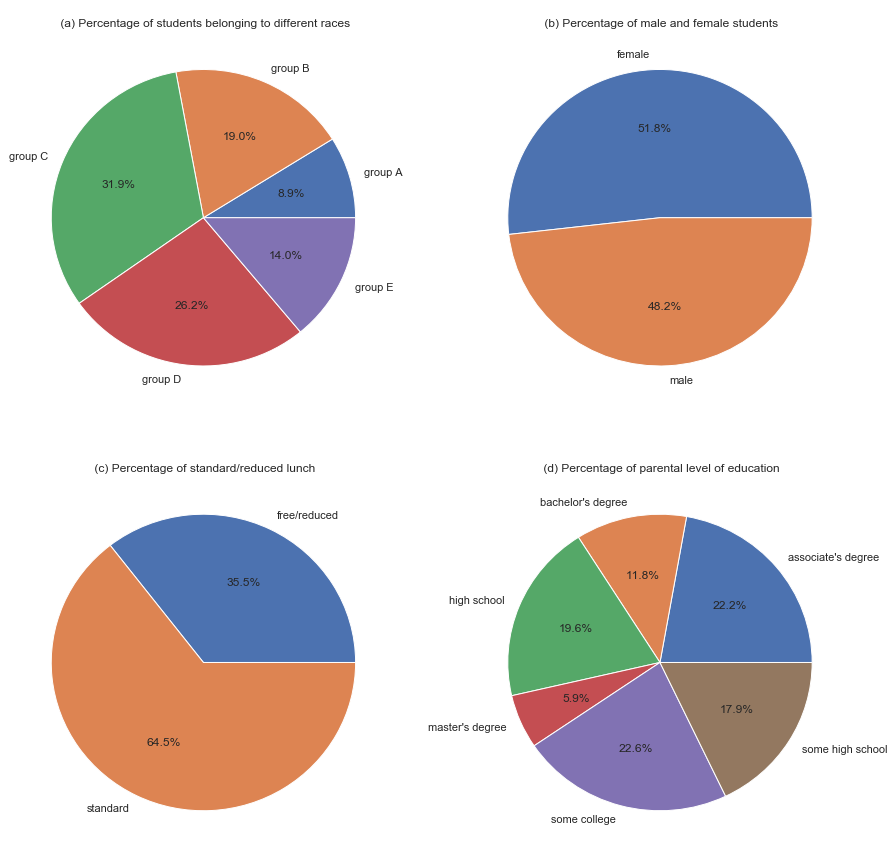

In [117]:
fig = plt.figure(figsize=(15,15))

#Percentage of students for different Race/Ethnicity
ax1 = fig.add_subplot(221)
x1 = data_df.groupby(by=data_df['race/ethnicity']).count()['lunch']
ax1.pie(x = x1, labels = x1.index, autopct='%1.1f%%')
ax1.set_title("\n (a) Percentage of students belonging to different races")

#Percentage of Male/Female
ax2 = fig.add_subplot(222)
x2 = data_df.groupby(by=data_df['gender']).count()['lunch']
ax2.pie(x = x2, labels = x2.index, autopct='%1.1f%%')
ax2.set_title("\n (b) Percentage of male and female students")

#Percentage of standard/reduced lunch
ax3 = fig.add_subplot(223)
x3 = data_df.groupby(by=data_df['lunch']).count()['gender']
ax3.pie(x = x3, labels = x3.index, autopct='%1.1f%%')
ax3.set_title("\n (c) Percentage of standard/reduced lunch")

#Percentage parental level of education
ax4 = fig.add_subplot(224)
x4 = data_df.groupby(by=data_df['parental level of education']).count()['lunch']
ax4.pie(x = x4, labels = x4.index, autopct='%1.1f%%')
ax4.set_title("\n (d) Percentage of parental level of education")

plt.show()

## It is clear from the chart that majority of the students belong to group C and group D. The number of female students are slightly higher than male students. Majority of the students take standard lunch than the reduced lunch. Only 6% of the parents have Masters degree, whereas approx 45% of parents have associate/colleage degree combined.


Let's understand about the basic measures like minimum, maximum, mean, median, mode, standard deviation etc. of the students marks in Math, Reading and Writing

In [97]:
data_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


We can see here lowest average mark is in Math and have a lowest mark 0. The max mark is 100 for Math, Reading and Writing

Lets visualize the mark distribution in box plots for Math, Reading and Writing

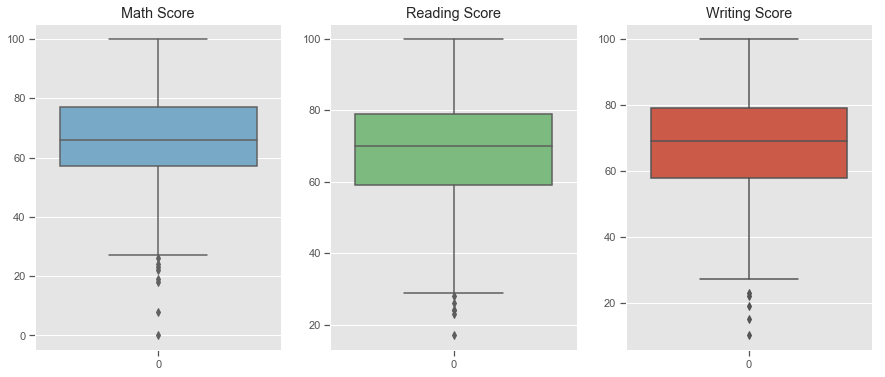

In [98]:
## Distribution of marks in different Subjuct
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
#sns.boxplot(x=tips["total_bill"])

#sns.barplot(x='race/ethnicity',y='math score',data=data_df,edgecolor='k')
sns.boxplot(data = data_df["math score"], palette="Blues").set_title('Math Score')

plt.subplot(1,3,2)
sns.boxplot(data = data_df["reading score"], palette="Greens").set_title('Reading Score')
#sns.barplot(x='race/ethnicity',y='reading score',data=data_df,edgecolor='k')

plt.subplot(1,3,3)
sns.boxplot(data = data_df["writing score"]).set_title('Writing Score')
#sns.barplot (x='race/ethnicity',y='writing score',data=data_df,edgecolor='k')

plt.show()

# Visualize the effect of gender in different course scores of students

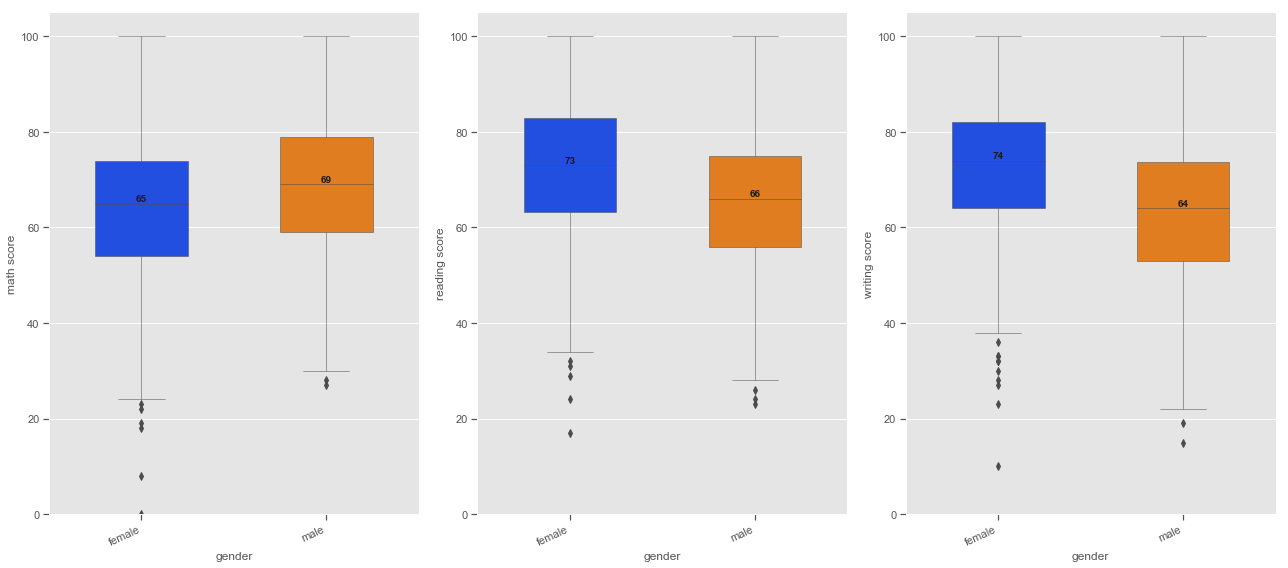

In [99]:
def Plot_Set(data_df,xcol,ycols):
    df = data_df.sort_values(by=xcol)
    fig,axarr = plt.subplots(1,3,figsize=(18,8))
    for id,ycol in enumerate(ycols):
        medians = data_df.groupby([xcol])[ycol].median().values
        median_labels = [str(np.round(s, 2)) for s in medians]
        pos = range(len(medians))
        sns.boxplot(x=xcol, y=ycol, data=df,width=0.5,palette='bright',ax=axarr[id],linewidth=0.5)
        for tick,label in zip(pos,axarr[id].get_xticklabels()):
            axarr[id].text(pos[tick], medians[tick] + 0.5, median_labels[tick], horizontalalignment='center', size='medium', color='k', weight='semibold')
        axarr[id].set_ylim([0,105])
        plt.setp(axarr[id].get_xticklabels(), rotation=25,ha='right')
    #fig.suptitle('Variation of Scores with '+xcol,fontsize=16,y=1.05)
    plt.tight_layout()
    plt.show()
    
Plot_Set(data_df,xcol='gender',ycols=['math score','reading score','writing score'])

# Distribution Of Math Course Marks

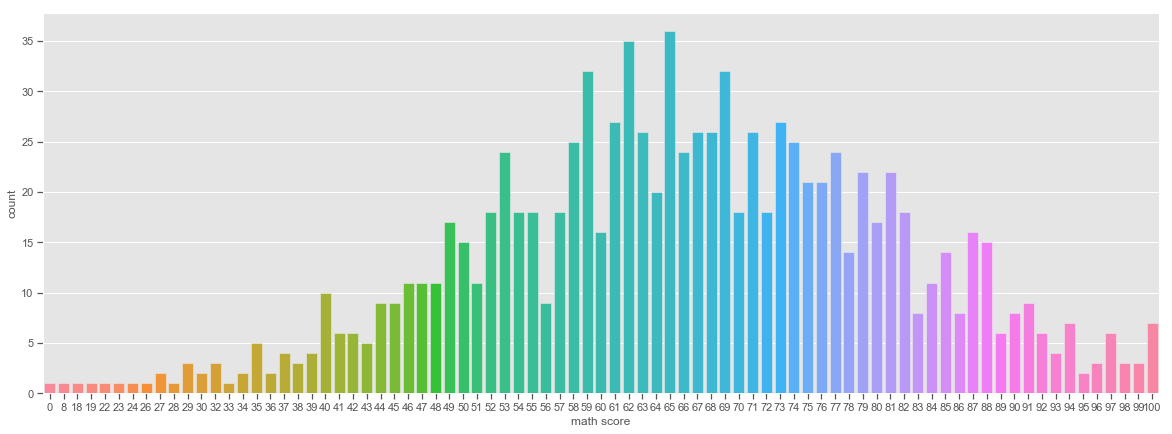

In [100]:
#DISRTRIBUTION OF MARKS
fig1, ax1 = plt.subplots(figsize=(20,7))
p = sns.countplot(data=data_df, x = 'math score',saturation=1)

#  Observation-

### Maximum students have attain marks between 60-80 in Maths.

## Distribution Of Reading Course Marks

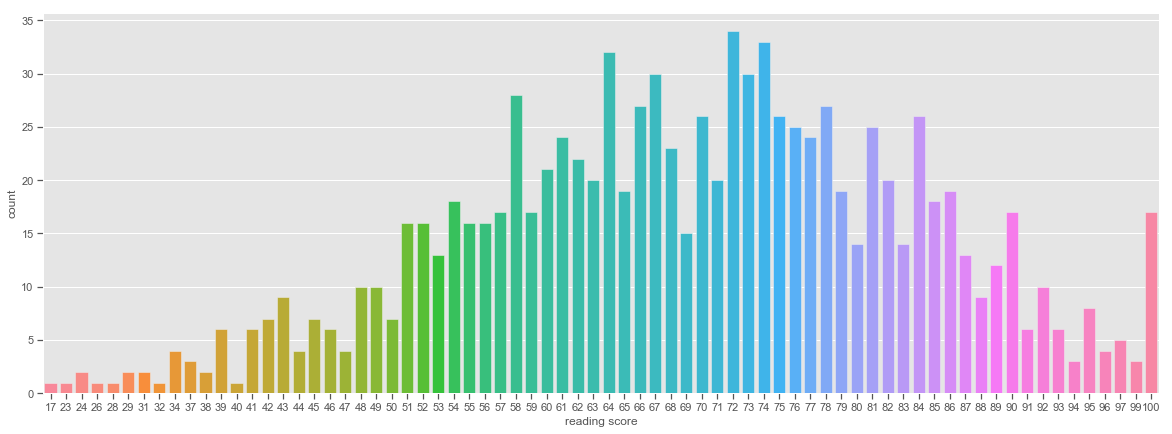

In [101]:
fig1, ax1 = plt.subplots(figsize=(20,7))
p = sns.countplot(data=data_df, x = 'reading score',saturation=1)

# Observation-

Maximum students have attain marks between 60-80 in Reading.

## Distribution Of Writing Marks

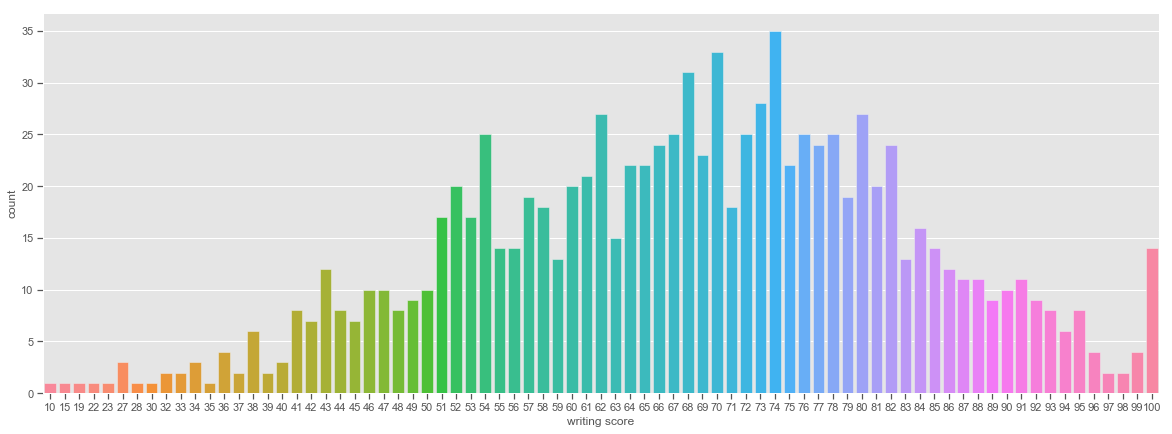

In [102]:
fig1, ax1 = plt.subplots(figsize=(20,7))
p = sns.countplot(data=data_df, x = 'writing score',saturation=1)

# Observation-

### Maximum students have attain marks between 60-75 in Writing.

# Now, let's have a look how reading score and writing score are related to each other
## Now I create scatter plots to examine reading score vs writing score :

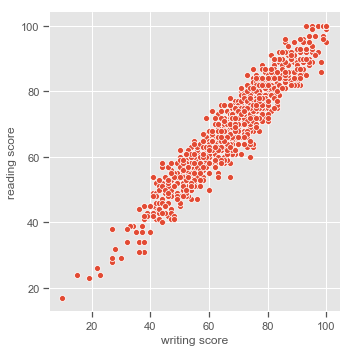

In [103]:
sns.relplot(x='writing score', y = 'reading score', data = data_df)

## From the graph it is quite clear that the reading score and writing score are linearly related. We can find the linear correlation coefficient between the scores using numpy package

In [104]:
r_reading_writing = np.corrcoef(data_df["reading score"], data_df["writing score"])[0, 1]
print(r_reading_writing)

0.954598077146248


### As we know pearson's linear correlation coefficient lies between -1 to 1. Here the value of the coefficient is 0.95(approx) is near to value 1. So, we conclude that reading score and writing score linearly related

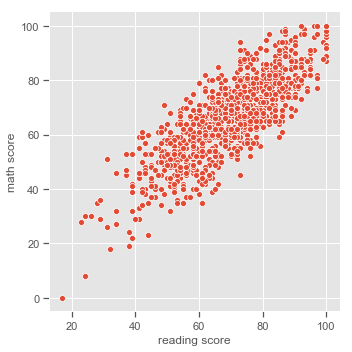

In [105]:
#scatter plots to examine reading score vs math score :
sns.relplot(x='reading score', y = 'math score', data = data_df)

In [106]:
#corelation coeficient
r_reading_math = np.corrcoef(data_df["reading score"], data_df["math score"])[0, 1]
print(r_reading_math)

0.8175796636720539


As we know pearson's linear correlation coefficient lies between -1 to 1. Here the value of the coefficient is 0.81(approx) that infers reading and math scores are not highly linear related.

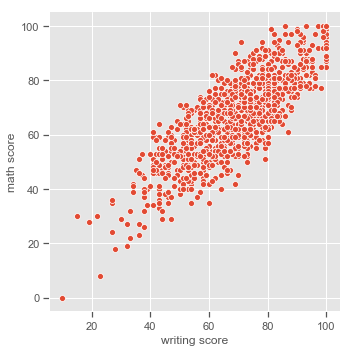

In [107]:
#scatter plots to examine writing score vs math score :
sns.relplot(x='writing score', y = 'math score', data = data_df)

In [108]:
#corelation coeficient writing score and math score
r_writing_math = np.corrcoef(data_df["writing score"], data_df["math score"])[0, 1]
print(r_writing_math)

0.8026420459498084


As we know pearson's linear correlation coefficient lies between -1 to 1. Here the value of the coefficient is 0.80(approx) that infers writing and math scores are not highly linear related.

# Now, we visualize the data to understand the influence of different factors on students performance

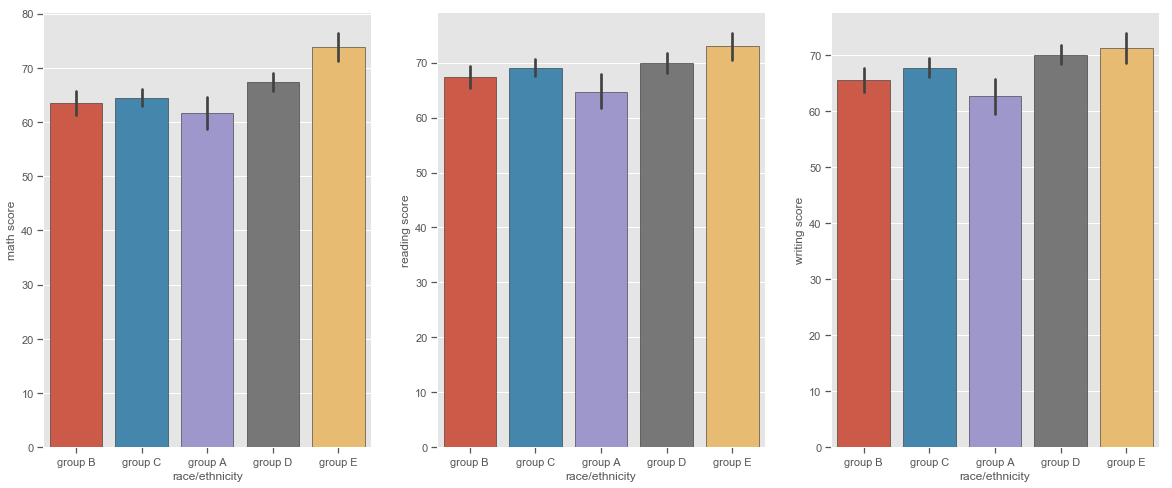

In [109]:
## Plotting bar plot to visualize the effect of race on marks of students

plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.barplot(x='race/ethnicity',y='math score',data=data_df,edgecolor='k')

plt.subplot(1,3,2)
sns.barplot(x='race/ethnicity',y='reading score',data=data_df,edgecolor='k')

plt.subplot(1,3,3)
sns.barplot (x='race/ethnicity',y='writing score',data=data_df,edgecolor='k')

plt.show()

## Let's compare the performances of students of different ethnicity using Violin plot



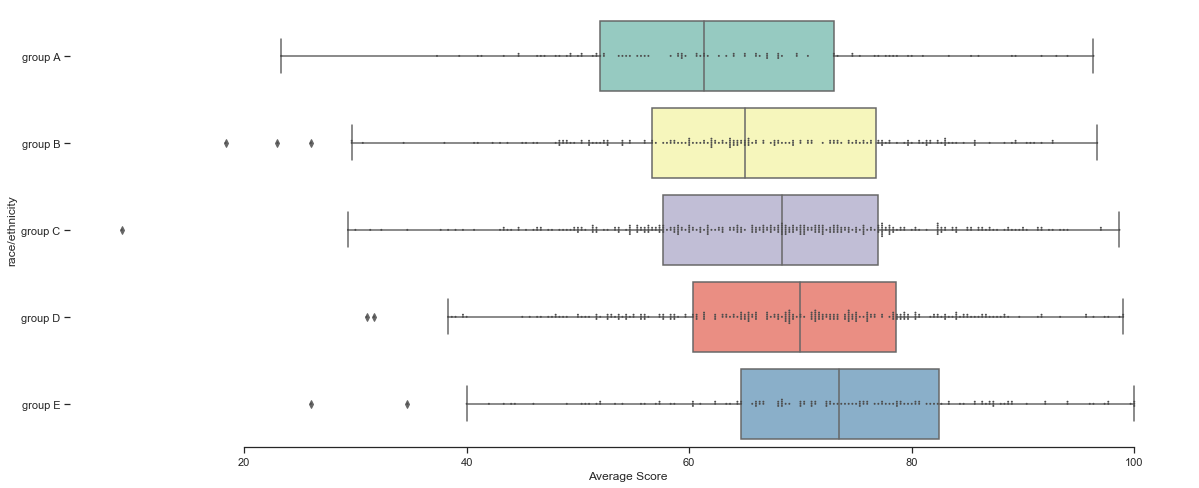

In [110]:
#Lets derive the average scores of math, reading and writing
data_df["Average Score"] = (data_df["math score"] + data_df["reading score"] + data_df["writing score"])/3

sns.set(style = "ticks")
plt.figure(figsize=(20,8))

order_race = ["group A","group B", "group C", "group D", "group E"]
sns.boxplot(x = "Average Score", y = "race/ethnicity", data = data_df, palette = "Set3", order = order_race)
sns.swarmplot(x = "Average Score", y = "race/ethnicity", data = data_df, size = 2, color = ".3", linewidth = 0, order = order_race)
sns.despine(trim = True, left = True)
#sns.set(style = "whitegrid")
#sns.violinplot(x= 'race/ethnicity', y = 'Percentage', data = data_df, palette = "Set3", order = order_race)


# Observation 

## From the above graph we can say that the students of group D are scored very well among the ethnicity groups



# Visualization different average course score based on lunch category


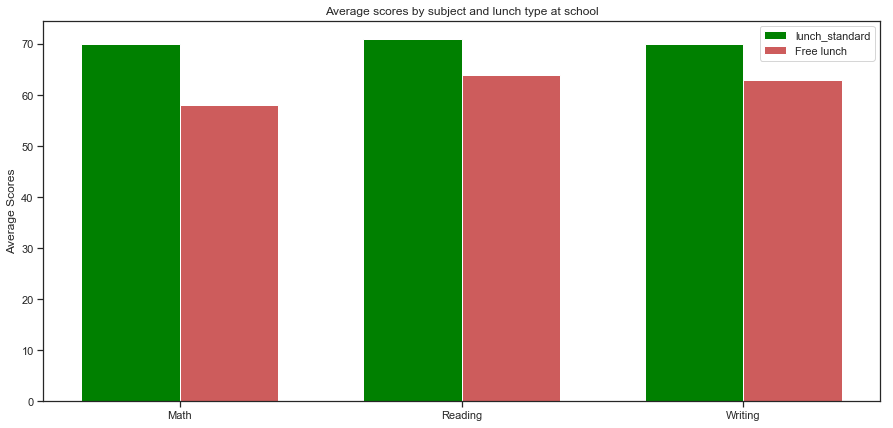

In [111]:
lunch_standard = (int(np.mean(data_df[data_df['lunch'] == 'standard']['math score'])),
              int(np.mean(data_df[data_df['lunch'] == 'standard']['reading score'])),
              int(np.mean(data_df[data_df['lunch'] == 'standard']['writing score'])))

lunch_free = (int(np.mean(data_df[data_df['lunch'] == 'free/reduced']['math score'])), 
               int(np.mean(data_df[data_df['lunch'] == 'free/reduced']['reading score'])),
               int(np.mean(data_df[data_df['lunch'] == 'free/reduced']['writing score'])))

ind = np.arange(3)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 7))
rects1 = ax.bar(ind - width/2, lunch_standard, width,
                color='green', label='lunch_standard')
rects2 = ax.bar(ind + width/2, lunch_free, width,
                color='IndianRed', label='Free lunch')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Scores')
ax.set_title('Average scores by subject and lunch type at school')
ax.set_xticks(ind)
ax.set_xticklabels(('Math', 'Reading', 'Writing'))
ax.legend(loc=1)
plt.show()


# Observation

### From the above graph we can conclude that students with standard lunch scored better than the others
### Students at schools which have standard lunch score significantly more than students at school which have free/reduced price lunch

### One reason for this might be: The students who go to schools which provide free/reduced price lunch typically belong to a low income family. So, the students might be working to support their family which would give them less time to study. 

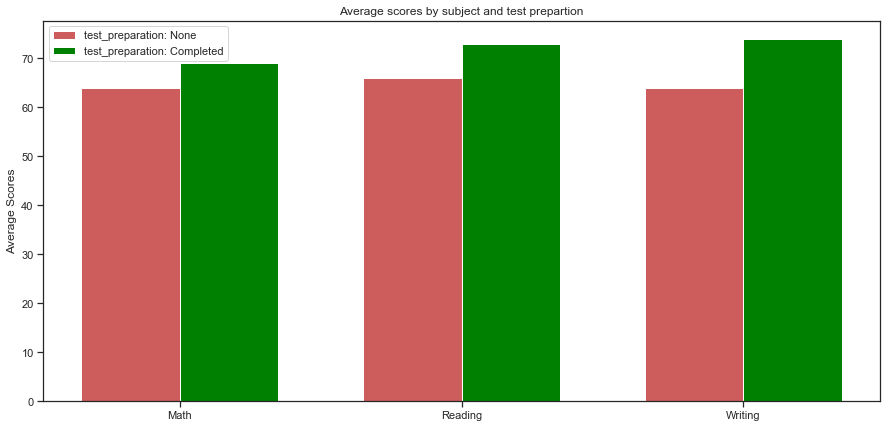

In [112]:
##Average marks based on Test Prepartion
test_preparation_none = (int(np.mean(data_df[data_df['test preparation course'] == 'none']['math score'])),
              int(np.mean(data_df[data_df['test preparation course'] == 'none']['reading score'])),
              int(np.mean(data_df[data_df['test preparation course'] == 'none']['writing score'])))

test_preparation_completed = (int(np.mean(data_df[data_df['test preparation course'] == 'completed']['math score'])), 
               int(np.mean(data_df[data_df['test preparation course'] == 'completed']['reading score'])),
               int(np.mean(data_df[data_df['test preparation course'] == 'completed']['writing score'])))

ind = np.arange(3)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 7))
rects1 = ax.bar(ind - width/2, test_preparation_none, width,
                color='IndianRed', label='test_preparation: None')
rects2 = ax.bar(ind + width/2, test_preparation_completed, width,
                color='Green', label='test_preparation: Completed')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Scores')
ax.set_title('Average scores by subject and test prepartion')
ax.set_xticks(ind)
ax.set_xticklabels(('Math', 'Reading', 'Writing'))
ax.legend(loc=2)
plt.show()

# It clearly shows students who completed test preparation, achieved higher scores.



# Observation -

### Girls have achieve more marks in reading and writing than boys.
### Boys have achieve more marks in maths than girls.

### From this chart we can say that on an average, men perform better than women at math but when it comes to reading and writing, women perform significantly better than men.

# Bar plot on the basis of parental level of education and different course


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

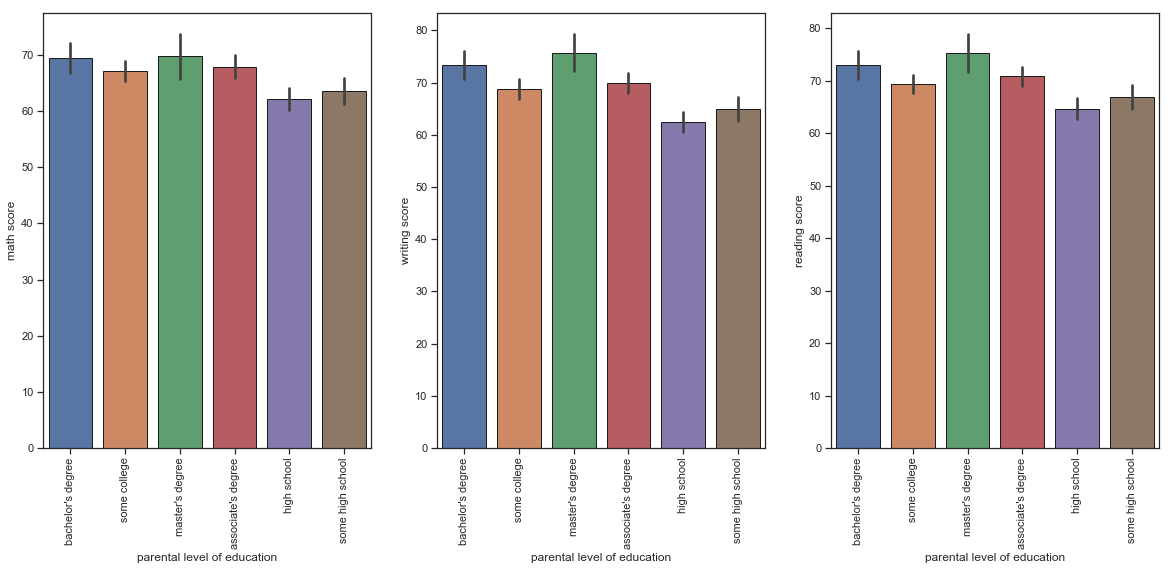

In [118]:
## plotting bar plot to visualize the effect of parents educational qualification on the marks of students
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.barplot(x='parental level of education', y= 'math score', data = data_df,edgecolor='k' )
plt.xticks(rotation = 90)

plt.subplot(1,3,2)
sns.barplot(x='parental level of education', y= 'writing score', data=data_df, edgecolor='k')
plt.xticks(rotation = 90)

plt.subplot(1,3,3)
sns.barplot(x='parental level of education',y='reading score', data=data_df, edgecolor='k')
plt.xticks(rotation = 90)

# Observation 

###  Students whose parents have 'Master Degree' have performed better in all subjects. Students whose parents have 'high school' degree have performed worst in exam.

### May be this is because the students whose parents went to university are better able to help their children in their studies . Therefore we can conclude that student's parents who have a degree have a chance of getting better marks

<Figure size 1440x720 with 0 Axes>

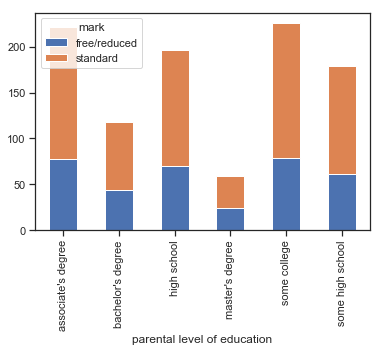

In [114]:
## plotting bar plot to visualize the effect of parents educational qualification on the type of lunch students take at school
plt.figure(figsize=(20,10))
#plt.subplot(1,2,1)
#sns.barplot(x='parental level of education', y= 'math score', data = data_df,edgecolor='k' )
#plt.xticks(rotation = 90)
#sns.catplot(x="parental level of education", col="lunch", data=data_df, kind="count", aspect = 1.6);
#plt.subplot(1,2,2)
#sns.barplot(x='parental level of education', y= 'writing score', data=data_df, edgecolor='k')
#plt.xticks(rotation = 90)

#sns.countplot(x = "parental level of education", data = data_df)
ct=pd.crosstab(data_df['parental level of education'], data_df['lunch'])
ct.plot.bar(stacked=True)
plt.legend(title='mark')
plt.show()
#g = 



# Conclusion:
In this project, I visualized students score in exam in different categories and identified correlation and influencing factors affect the score on the given dataset. We have seen Reading and Writing scores are linearly correlated compared to Reading vs. Math and Writing vs. Math. We have also seen students score is dependent on the gender and race/ethnicity. Parents’ level of education and the type of lunch students get at school are major influencing factors in terms of achieving higher score in exam. 
